In [1]:
from astroML.datasets import fetch_dr7_quasar

data = fetch_dr7_quasar()

In [2]:
import pandas as pd; import numpy as np
Data = np.array(data, dtype = data.dtype)
columns = ['sdssID', 'RA', 'dec', 'redshift', 'mag_u', 'err_u', 'mag_g', 'err_g', 'mag_r', 'err_r', 'mag_i', 'err_i', 'mag_z', 'err_z', 'mag_J', 'err_J', 'mag_H', 'err_H', 'mag_K', 'err_K', 'specobjid']
DF = pd.DataFrame(Data); del Data

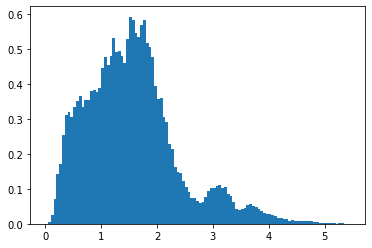

In [3]:
# Upsample the Redshift Distribution
import matplotlib.pyplot as plt
%matplotlib inline

zMax = np.max(DF['redshift'])
fixBins = np.arange(0, zMax, 0.05)
#fig, axs = plt.subplots(figsize=(5,5), tight_layout=True)
values, edges, _ = plt.hist(DF['redshift'], bins=fixBins, density=True)
centers = edges[1:]/2 + edges[:-1]/2

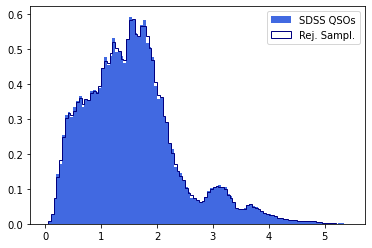

In [6]:
# Check that the two cloned distributions are similar to the observed one

from scipy import stats
# plt.plot(centers, values)
from scipy.interpolate import interp1d
pdfQSO = interp1d(x=centers, y=values, kind='linear', fill_value='extrapolate')#, assume_sorted=False)
# plt.plot(centers, [pdfQSO(c) for c in centers])
N = int(1e6)
### you can also use scipy.sampling to extract directly from the distribution!
xi = stats.uniform(0, zMax).rvs(N)
yi = stats.uniform(0, 0.6 ).rvs(N)
yT = pdfQSO(xi)

_ = plt.hist(DF['redshift'], density=True, bins=fixBins, facecolor='royalblue', label='SDSS QSOs')
_ = plt.hist(xi[yT > yi], density=True, bins=fixBins, histtype='step', edgecolor='navy', label='Rej. Sampl.')
_ = plt.legend()

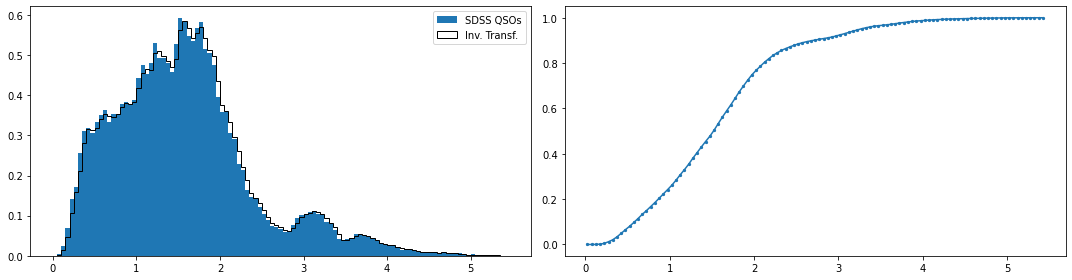

In [9]:
dx   = edges[1]-edges[0]
area = [dx * v for v in values]
cdf  = [ np.sum( area[:i] ) for i in range(len(values))]
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(15, 4))
axs[0].hist(DF['redshift'], bins=fixBins, density=True, label='SDSS QSOs')
axs[1].plot(centers, cdf)
cdfQSO = interp1d(x=centers, y=cdf, kind='slinear', fill_value='extrapolate')
x = np.linspace(0, zMax, 10000)
y = cdfQSO(x)
invcdfQSO = interp1d(x=y, y=x, kind='slinear', fill_value='extrapolate')
yi = stats.uniform(0,1).rvs(N)
xi = invcdfQSO(yi)
axs[1].scatter(centers, cdf, s=5)
_ = axs[0].hist(xi, bins=fixBins, density=True, edgecolor='black', histtype='step', label='Inv. Transf.')
_ = axs[0].legend()

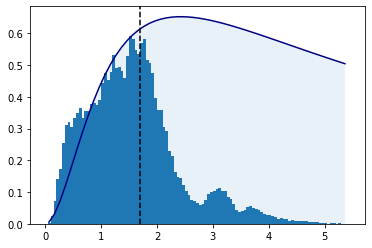

In [127]:
# What is the redshift distribution of quasars from SDSS? What should it be?

from astropy.cosmology import Planck18
import astropy.units as u
zMin = np.min(DF['redshift'])
z = np.arange(zMin, zMax, 0.1)
plt.hist(DF['redshift'], bins=fixBins, density=True)
plt.plot(z, 1.550*Planck18.differential_comoving_volume(z)/1e11, c='navy')
plt.axvline(1.7, c='k', ls='--')
plt.fill_between(x=z, y1=1.550*Planck18.differential_comoving_volume(z)/1e11, y2=0, alpha=0.1)

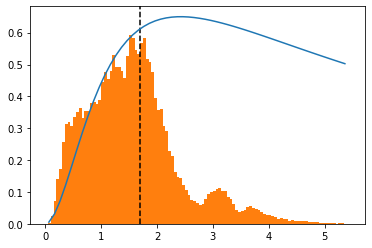

In [136]:
zPeak = 1.7
plt.axvline(zPeak, ls='--', c='k')
Vpeak = Planck18.comoving_volume(zPeak)
Npeak = len(DF['redshift'][DF['redshift'] < zPeak])
rQSO  = Npeak/Vpeak
fz = rQSO * Planck18.differential_comoving_volume(z)
plt.plot(z, 0.65*fz/max(fz))
_ = plt.hist(DF['redshift'], bins=fixBins, density=True)